In [1]:
from lithops import Storage,storage
from lithops.multiprocessing import Pool
from itertools import product
import lithops
import json
import io
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
stg = Storage()
data = stg.get_object('analysis.data', 'processeddata/sentimentsData.csv').decode()
data = io.StringIO(data)
fulldf = pd.read_csv(data, sep=",")

<AxesSubplot:xlabel='Date', ylabel='Sentiment'>

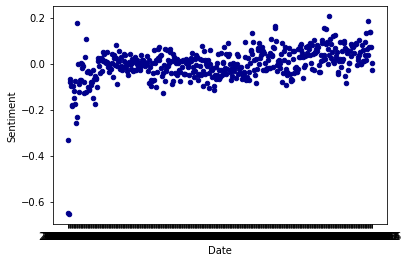

In [158]:
# Day sentiments from 470 days
daySent = pd.concat([fulldf['Date'], fulldf['Sentiment']], axis=1, keys=['Date', 'Sentiment']).groupby(fulldf["Date"]).mean().reset_index()
daySent.plot.scatter(x='Date', y='Sentiment', c='DarkBlue')


<AxesSubplot:xlabel='Date'>

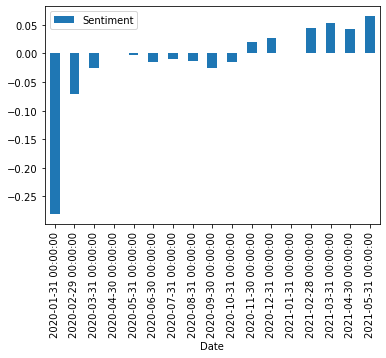

In [50]:
# Sentiments per month
monthSent = daySent.resample('1M').mean().reset_index()
monthSent.plot(kind='bar',x='Date',y='Sentiment')

<AxesSubplot:ylabel='Count'>

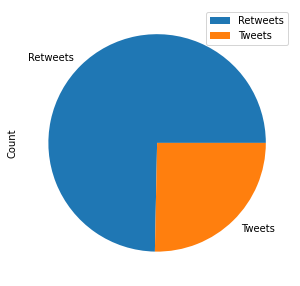

In [100]:
# Check for tweets and retweets count
retweetCount = fulldf[(fulldf['Retweet'] == True)].count()["Id"]
noRetweetCount = fulldf[(fulldf['Retweet'] == False)].count()["Id"]
retweetGraph = pd.DataFrame({'Count': [retweetCount, noRetweetCount]}, index=['Retweets', 'Tweets'])
retweetGraph.plot.pie(y='Count', figsize=(5, 5))

<AxesSubplot:>

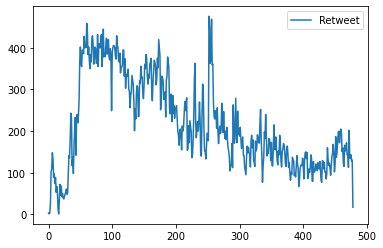

In [161]:
# Tweets and Retweets count trough days
retweetsDay = pd.concat([fulldf['Retweet']], axis=1, keys=['Retweet']).groupby(fulldf["Date"]).count().reset_index()
retweetsDay.plot()
#month_starts = [1,32,61,92,122,153,183,214,245,275,306,336,367,396,427,457,488]
#month_names = ['2020-Jan','2020-Feb','2020-Mar','2020-Apr','2020-May','2020-Jun','2020-Jul','2020-Aug','2020-Sep','2020-Oct','2020-Nov','2020-Dec','2021-Jan','2021-Feb','2021-Mar','2021-Apr','2021-May'] 

<AxesSubplot:ylabel='Count'>

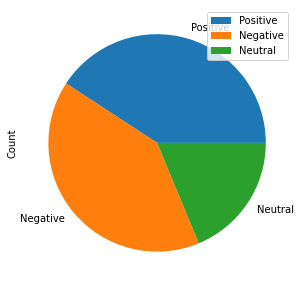

In [163]:
# Total of retweets sentiments
posRetweets = fulldf[(fulldf['Retweet'] == True) & (fulldf['Sentiment'] > 0)].count()["Id"]
negRetweets = fulldf[(fulldf['Retweet'] == True) & (fulldf['Sentiment'] < 0)].count()["Id"]
neuRetweets = fulldf[(fulldf['Retweet'] == True) & (fulldf['Sentiment'] == 0)].count()["Id"]
retweetGraph = pd.DataFrame({'Count': [posRetweets, negRetweets, neuRetweets]}, index=['Positive', 'Negative', 'Neutral'])
retweetGraph.plot.pie(y='Count', figsize=(5, 5))

<AxesSubplot:xlabel='Date'>

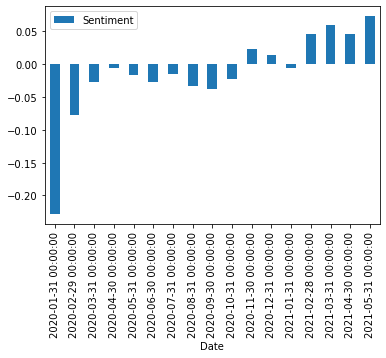

In [166]:
# Retweet sentiments per month
retweetDf = fulldf[(fulldf['Retweet'] == True)]
monthSent = pd.concat([retweetDf['Date'], retweetDf['Sentiment']], axis=1, keys=['Date', 'Sentiment']).groupby(fulldf["Date"]).mean().reset_index()
monthSent.set_index('Date', inplace=True)
monthSent.index = pd.to_datetime(monthSent.index)
monthSent = monthSent.resample('1M').mean().reset_index()
monthSent.plot(kind='bar',x='Date',y='Sentiment')

In [ ]:
R